# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

## Etapa 2 Crisp-DM: Entendimento dos dados<a name="2"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### Dicionário de dados <a name="dicionario"></a>

| Variável              | Descrição                                                                                                  | Tipo             |
| --------------------- |:----------------------------------------------------------------------------------------------------------:| ----------------:|
| data_ref              | Data de referência de coleta das variáveis                                                                 | object           |
| id_cliente            | Código identificador exclusivo do cliente                                                                  | int              |
| sexo                  | Sexo do cliente (M = 'Masculino'; F = 'Feminino')                                                          | object (binária) |
| posse_de_veiculo      | Indica se o cliente possui veículo (True = 'Possui veículo'; False = 'Não possui veículo')                 | bool (binária)   |
| posse_de_imovel       | Indica se o cliente possui imóvel (True = 'Possui imóvel'; False = 'Não possui imóvel')                    | bool (binária)   |
| qtd_filhos            | Quantidade de filhos do cliente                                                                            | int              |
| tipo_renda            | Tipo de renda do cliente (Empresário, Assalariado, Servidor público, Pensionista, Bolsista)                | object           |
| educacao              | Grau de instrução do cliente (Primário, Secundário, Superior incompleto, Superior completo, Pós graduação) | object           |
| estado_civil          | Estado civil do cliente (Solteiro, União, Casado, Separado, Viúvo)                                         | object           |
| tipo_residencia       | Tipo de residência do cliente (Casa, Governamental, Com os pais, Aluguel, Estúdio, Comunitário)            | object           |
| idade                 | Idade do cliente em anos                                                                                   | int              |
| tempo_emprego         | Tempo no emprego atual                                                                                     | float            |
| qt_pessoas_residencia | Quantidade de pessoas que moram na residência                                                              | float            |
| **renda**             | Valor numérico decimal representando a renda do cliente em reais                                           | float            |

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from streamlit_pandas_profiling import st_profile_report
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline

In [29]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [30]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [31]:
renda.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)

print('Quantidade total de linhas:', len(renda), '\n')

print('Quantidade de linhas duplicadas:', renda.duplicated().sum(), '\n')

print('Quantidade após remoção das linhas duplicadas:', 
      len(renda.drop_duplicates()), '\n')

renda.drop_duplicates(inplace=True, ignore_index=True)
renda.info()

Quantidade total de linhas: 15000 

Quantidade de linhas duplicadas: 407 

Quantidade após remoção das linhas duplicadas: 14593 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               14593 non-null  object 
 1   sexo                   14593 non-null  object 
 2   posse_de_veiculo       14593 non-null  bool   
 3   posse_de_imovel        14593 non-null  bool   
 4   qtd_filhos             14593 non-null  int64  
 5   tipo_renda             14593 non-null  object 
 6   educacao               14593 non-null  object 
 7   estado_civil           14593 non-null  object 
 8   tipo_residencia        14593 non-null  object 
 9   idade                  14593 non-null  int64  
 10  tempo_emprego          12090 non-null  float64
 11  qt_pessoas_residencia  14593 non-null  float64
 12  renda                  14593

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [32]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof.to_file('./output/renda_analisys.html')


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 77.13it/s]


####  Estatísticas descritivas das variáveis quantitativas <a name="describe"></a>



In [7]:
renda.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
qtd_filhos,14593.0,0.433290,0.746029,0.000000,0.000000,0.000000,1.000000,14.000000
idade,14593.0,43.868910,11.276626,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12090.0,7.724567,6.718007,0.117808,3.006164,6.013699,10.123288,42.906849
qt_pessoas_residencia,14593.0,2.207086,0.909117,1.000000,2.000000,2.000000,3.000000,15.000000
renda,14593.0,5698.140557,8314.021152,118.710000,2018.880000,3488.410000,6379.570000,245141.670000


In [8]:
renda_quant = renda[['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda','posse_de_veiculo','posse_de_imovel']]
renda_quant

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,posse_de_veiculo,posse_de_imovel
0,0,26,6.602740,1.0,8060.34,False,True
1,0,28,7.183562,2.0,1852.15,True,True
2,0,35,0.838356,2.0,2253.89,True,True
3,1,30,4.846575,3.0,6600.77,False,True
4,0,33,4.293151,1.0,6475.97,True,False
...,...,...,...,...,...,...,...
14588,0,48,13.887671,1.0,7990.58,False,True
14589,0,57,NaN,1.0,10093.45,False,True
14590,0,45,7.832877,2.0,604.82,True,True
14591,0,36,4.298630,2.0,3352.27,True,False


In [9]:
renda_quant.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,posse_de_veiculo,posse_de_imovel
qtd_filhos,1.000000,-0.360361,-0.063588,0.889449,0.030296,0.120952,-0.021670
idade,-0.360361,1.000000,0.321970,-0.339365,0.023445,-0.178247,0.141139
tempo_emprego,-0.063588,0.321970,1.000000,-0.067115,0.385014,-0.074186,0.011015
qt_pessoas_residencia,0.889449,-0.339365,-0.067115,1.000000,0.048616,0.169019,-0.022050
renda,0.030296,0.023445,0.385014,0.048616,1.000000,0.099418,0.004188
posse_de_veiculo,0.120952,-0.178247,-0.074186,0.169019,0.099418,1.000000,-0.013238
posse_de_imovel,-0.021670,0.141139,0.011015,-0.022050,0.004188,-0.013238,1.000000


A partir da matriz de correlação, é possível observar que a variável que apresenta maior relação com a varíavel renda é tempo_emprego, com um índice de correlação de 38,5%.

### Entendimento dos dados - Bivariadas




#### Matriz de dispersão <a name="dispersao"></a>


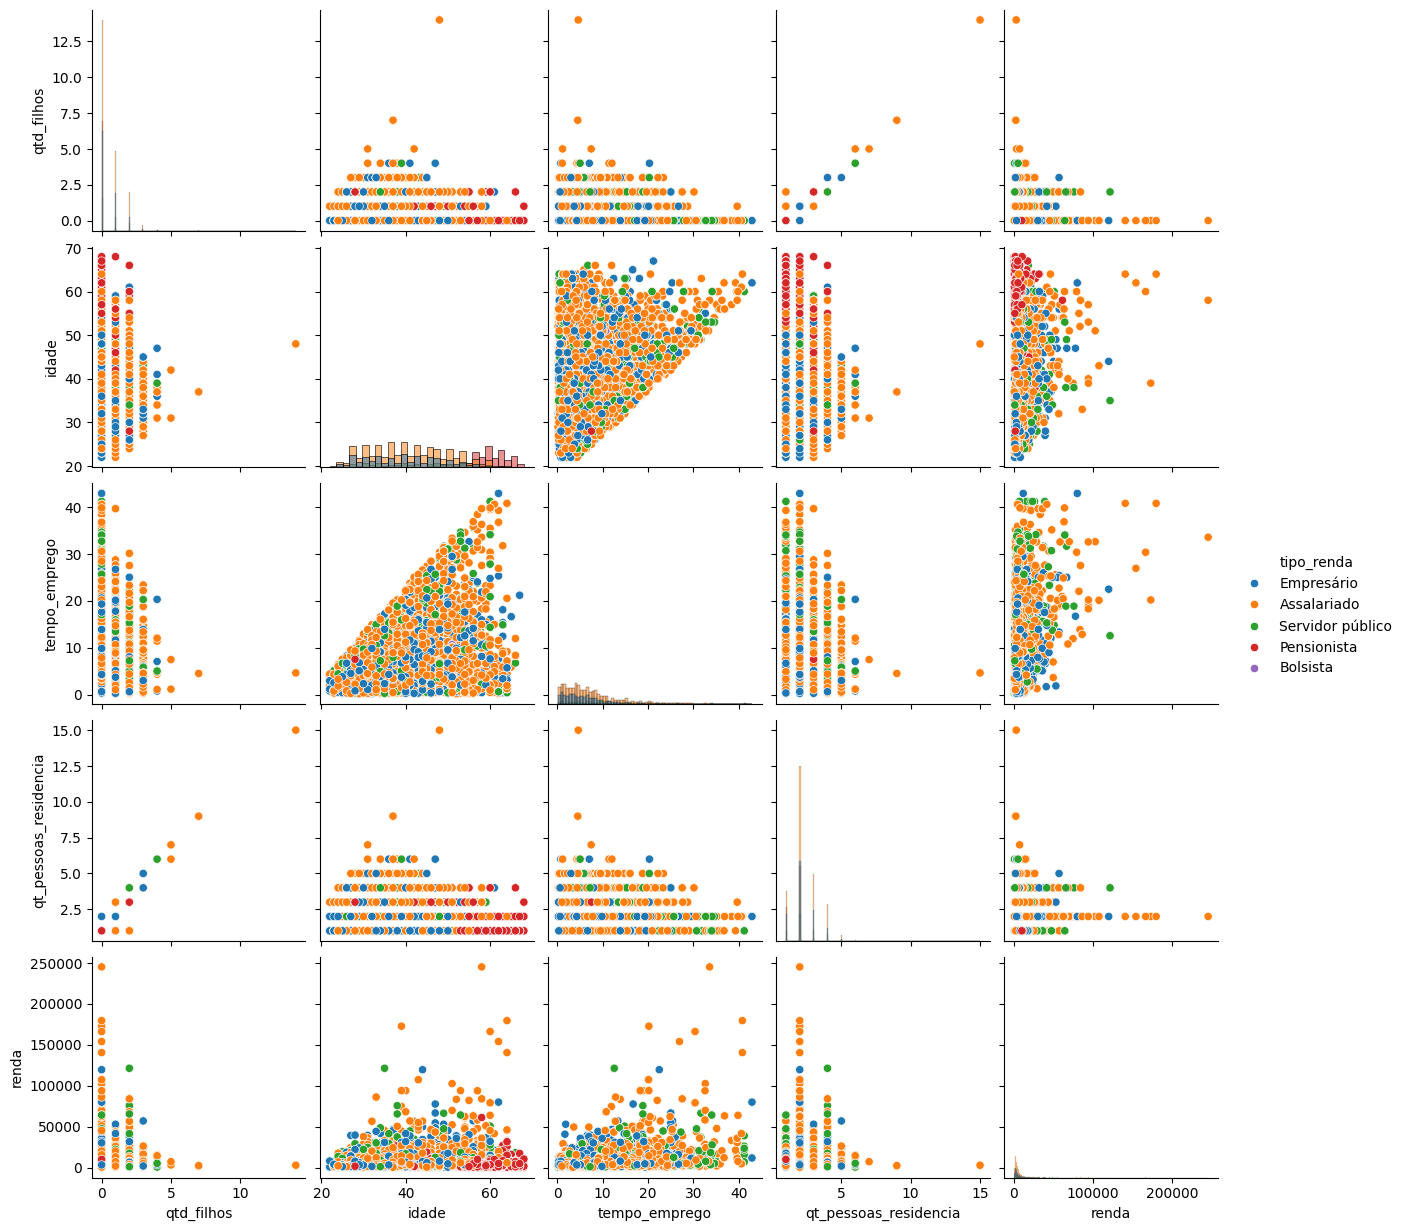

In [10]:
sns.pairplot(data=renda, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'], 
             diag_kind='hist')

plt.show()

Ao analisar o pairplot, que consiste na matriz de dispersão, é possível identificar alguns outliers na variável renda, os quais podem afetar o resultado da análise de tendência, apesar de ocorrerem com baixa frequência. Além disso, é observada uma baixa relação entre praticamente quase todas as variáveis quantitativas, exceto talvez pela variável tempo_emprego que parece assumir uma tendência de crescimento quanto maior o tempo de emprego.

##### Clustermap <a name="clustermap"></a>

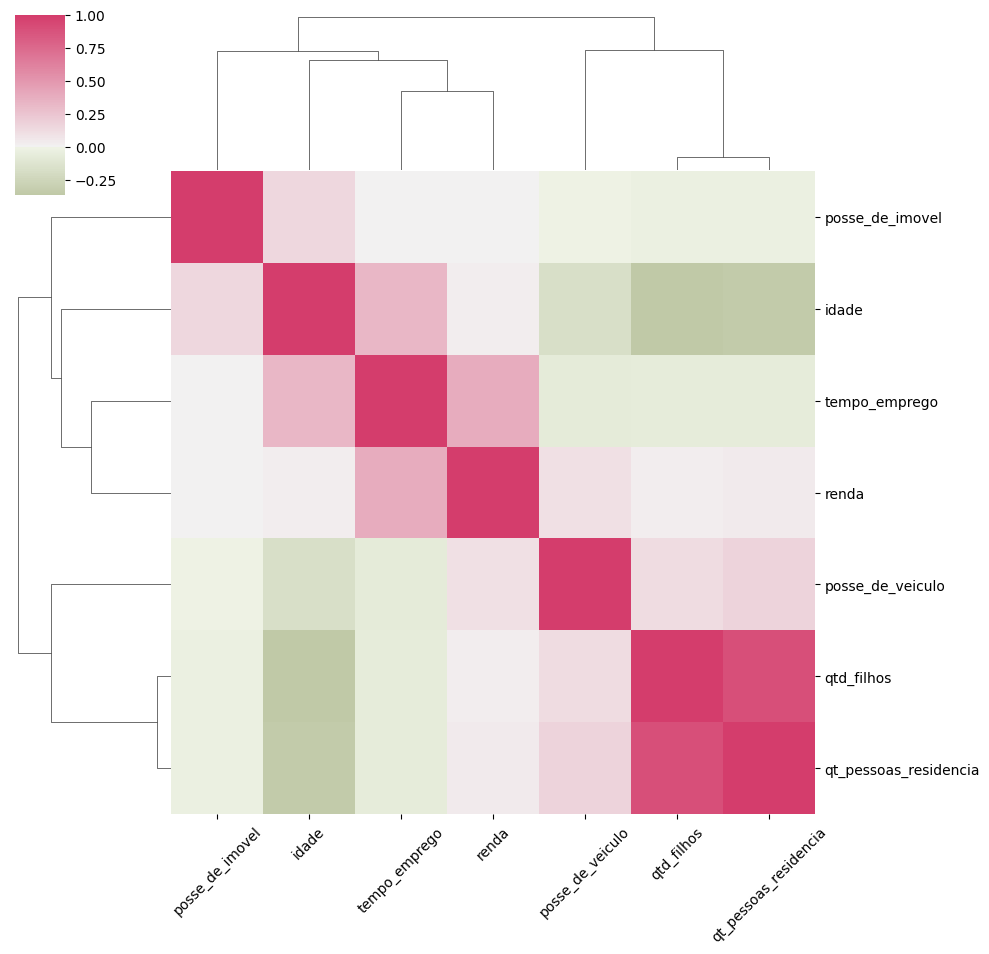

In [11]:
cmap = sns.diverging_palette(h_neg=100, 
                             h_pos=359, 
                             as_cmap=True, 
                             sep=1, 
                             center = 'light')

ax = sns.clustermap(data=renda_quant.corr(), 
               figsize=(10, 10), 
               center=0, 
               cmap=cmap)
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=45)

plt.show()

É possível observar que penas a variável 'tempo_emprego' apresenta um índice considerável para análise. Além disso, foram apresentadas duas variáveis booleanas, 'posse_de_imovel' e 'posse_de_veiculo', onde a variável que possui mais relação com a renda é a de posse de veículo.

#####  Linha de tendência <a name="tendencia"></a>

In [12]:
plt.figure(figsize=(14,7))

sns.scatterplot(x='tempo_emprego',
                y='renda', 
                hue='tipo_renda', 
                size='idade',
                data=renda,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=renda, 
            scatter=False, 
            color='.3')

<Axes: xlabel='tempo_emprego', ylabel='renda'>

É possível identificar facilmente a covariância positiva com a inclinação da linha de tendência, podemos afirmar então que existe uma relação entre os dados de renda e tempo de emprego.

#### Análise das variáveis qualitativas <a name="qualitativas"></a>

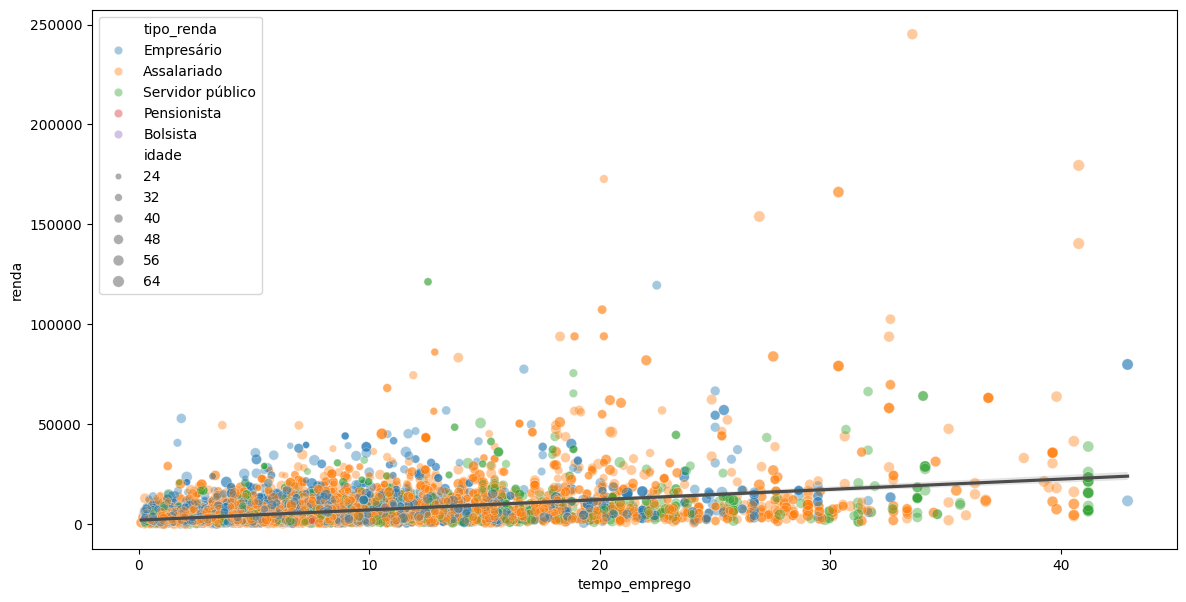

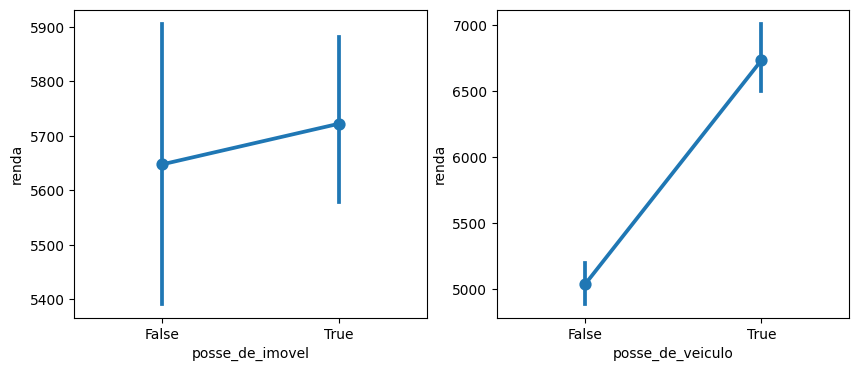

In [13]:
#Os dados que mais mostraram relação com com a variável renda, além do tempo de emprego foram os dados de posse de veículo.
#Iremos realizar alguamas visualizações e incluir também os dados visuais de posse de imóvel para completar essa análise.

plt.rc('figure', figsize=(10,4))
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.pointplot(x='posse_de_imovel', 
              y='renda',  
              data=renda, 
              dodge=True, 
              ax=axes[0])

sns.pointplot(x='posse_de_veiculo', 
              y='renda', 
              data=renda, 
              dodge=True, 
              ax=axes[1])

plt.show()

Ao comparar os gráficos acima, nota-se que a variável 'posse_de_veículo' apresenta maior relevância na predição de renda, evidenciada pela maior distância entre os intervalos de confiança para aqueles que possuem e não possuem veículo, ao contrário da variável 'posse_de_imóvel' que não apresenta diferença significativa entre as possíveis condições de posse imobiliária.

##### Análise das variáveis qualitativas ao longo do tempo <a name="tempo"></a>

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


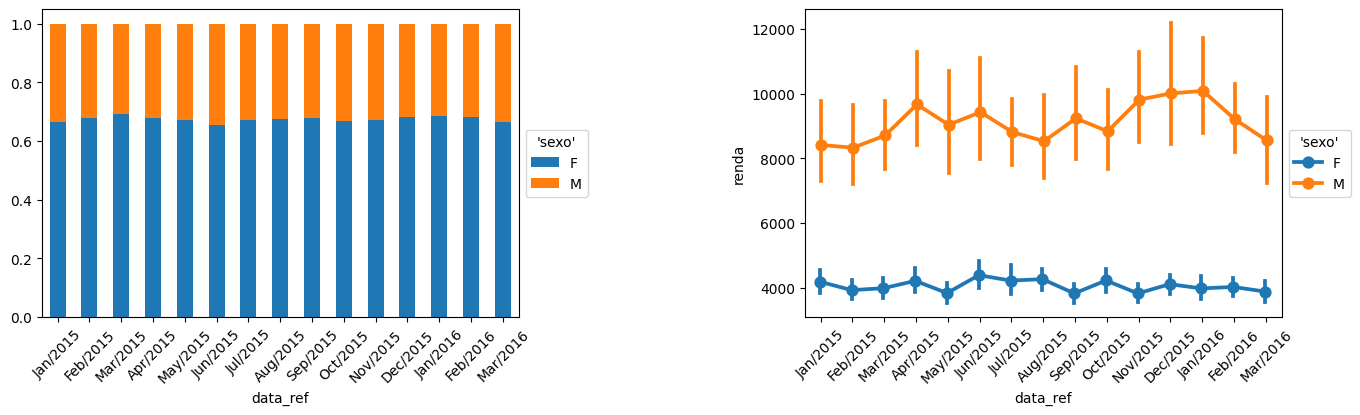

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


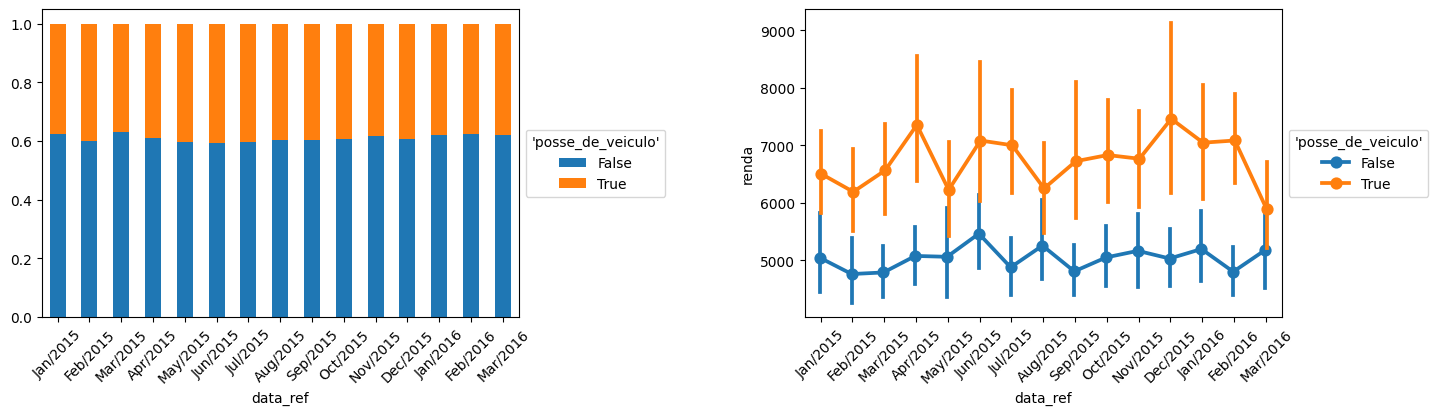

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


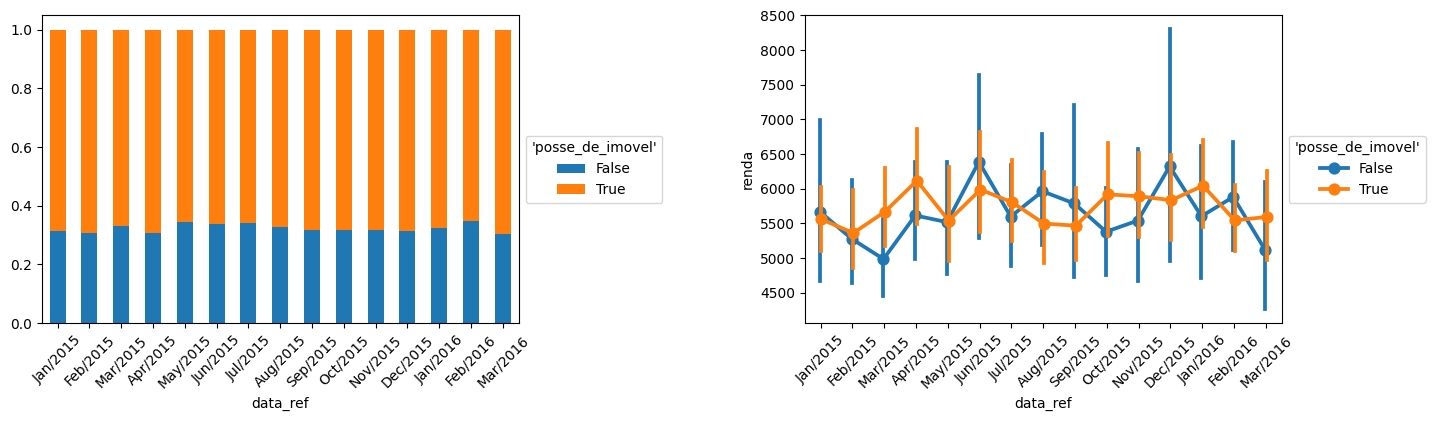

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


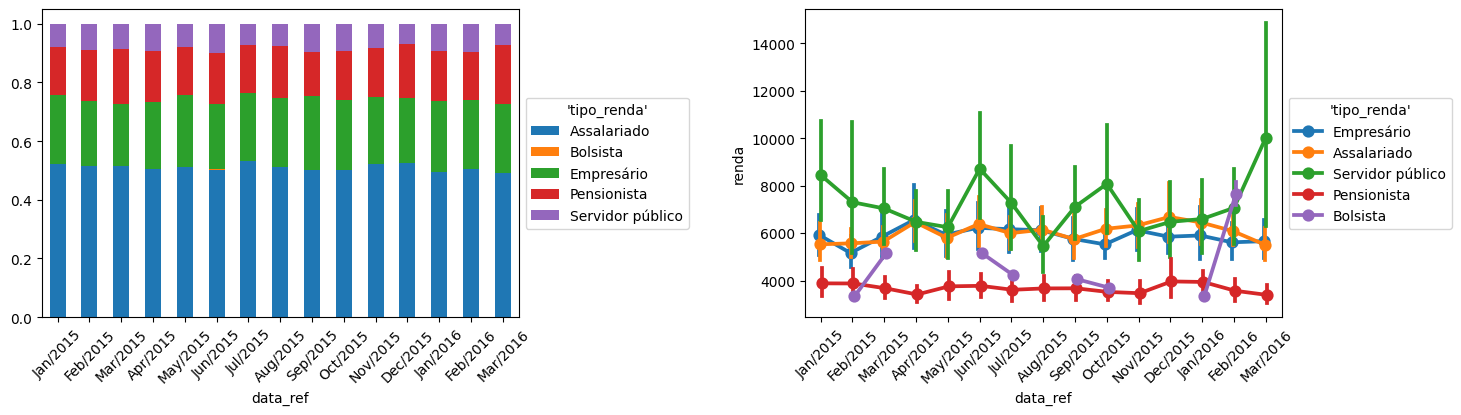

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


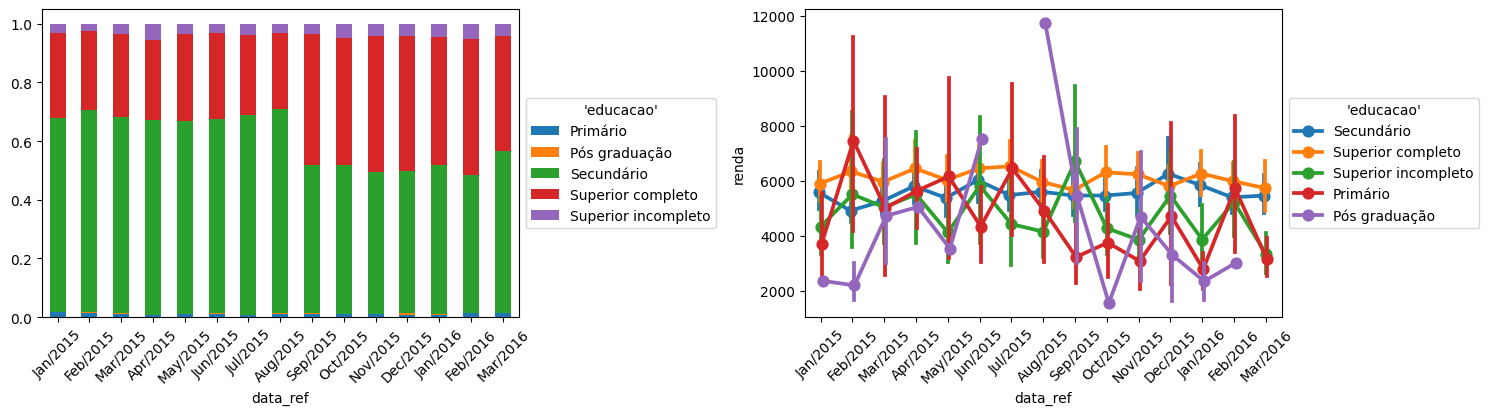

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


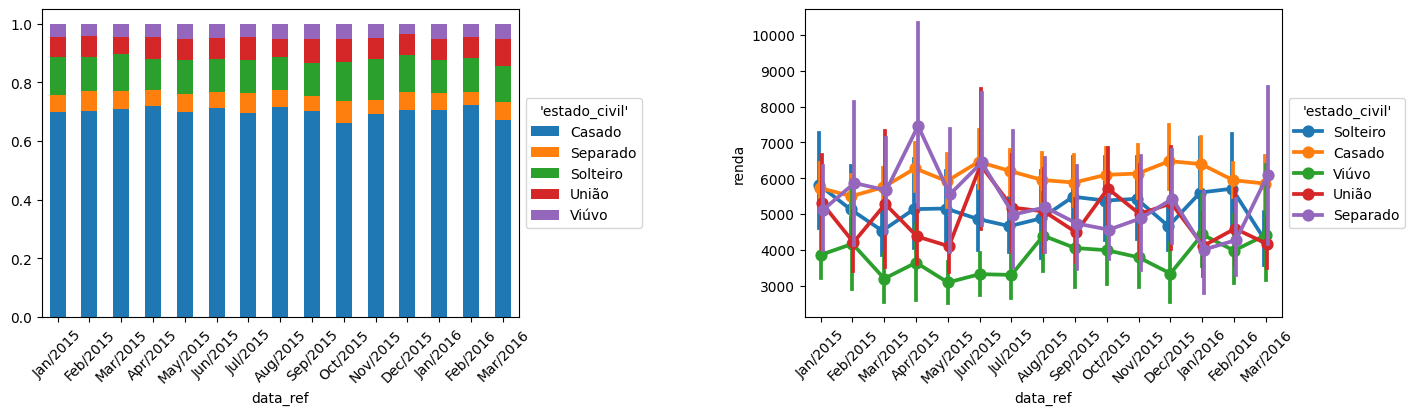

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


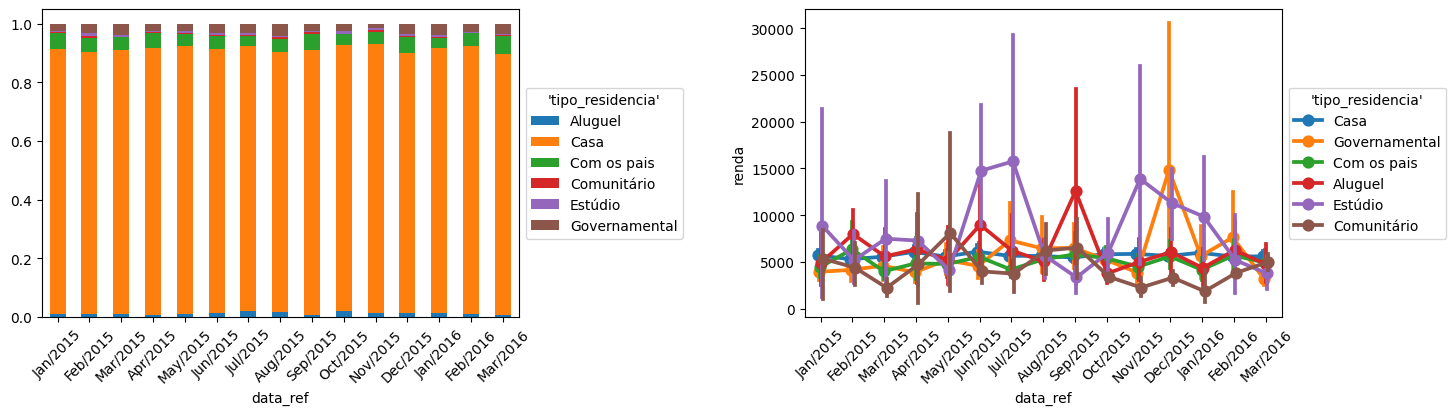

In [14]:
renda['data_ref'] = pd.to_datetime(arg=renda['data_ref'])

qualitativas = renda.select_dtypes(include=['object', 'boolean']).columns

plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = renda['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()
    
    # barras empilhadas:
    renda_crosstab = pd.crosstab(index=renda['data_ref'], 
                                 columns=renda[col], 
                                 normalize='index')
    ax0 = renda_crosstab.plot.bar(stacked=True, 
                                  ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    # perfis médios no tempo: 
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    plt.show()

A análise das variáveis qualitativas evidencia a correlação da variável renda com a variável de posse de veículo. As demais variáveis não representam
correlação relevante.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [15]:
renda.drop(columns='data_ref', inplace=True)
renda.dropna(inplace=True)

pd.DataFrame(index=renda.nunique().index, 
             data={'tipos_dados': renda.dtypes, 
                   'qtd_valores': renda.notna().sum(), 
                   'qtd_categorias': renda.nunique().values})

,tipos_dados,qtd_valores,qtd_categorias
sexo,object,12090,2
posse_de_veiculo,bool,12090,2
posse_de_imovel,bool,12090,2
qtd_filhos,int64,12090,8
tipo_renda,object,12090,5
educacao,object,12090,5
estado_civil,object,12090,5
tipo_residencia,object,12090,6
idade,int64,12090,46
tempo_emprego,float64,12090,2589


### Conversão das variáveis categóricas em variáveis numéricas (dummies) <a name="dummies"></a>

In [16]:
renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12090 entries, 0 to 14592
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12090 non-null  bool   
 1   posse_de_imovel                12090 non-null  bool   
 2   qtd_filhos                     12090 non-null  int64  
 3   idade                          12090 non-null  int64  
 4   tempo_emprego                  12090 non-null  float64
 5   qt_pessoas_residencia          12090 non-null  float64
 6   renda                          12090 non-null  float64
 7   sexo_F                         12090 non-null  bool   
 8   sexo_M                         12090 non-null  bool   
 9   tipo_renda_Assalariado         12090 non-null  bool   
 10  tipo_renda_Bolsista            12090 non-null  bool   
 11  tipo_renda_Empresário          12090 non-null  bool   
 12  tipo_renda_Pensionista         12090 non-null  bool

In [17]:
(renda_dummies.corr()['renda']
              .sort_values(ascending=False)
              .to_frame()
              .reset_index()
              .rename(columns={'index':'var', 
                               'renda':'corr'})
              .style.bar(color=['darkred', 'darkgreen'], align=0)
)

,var,corr
0,renda,1.000000
1,tempo_emprego,0.385014
2,sexo_M,0.265174
3,idade,0.127516
4,posse_de_veiculo,0.082040
5,estado_civil_Casado,0.054290
6,tipo_renda_Servidor público,0.042177
7,tipo_residencia_Estúdio,0.026417
8,qt_pessoas_residencia,0.019571
9,educacao_Superior completo,0.017425


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo



A técnica escolhida foi o DecisionTreeRegressor, devido à sua capacidade de lidar com problemas de regressão, como a previsão de renda dos clientes. Além disso, árvores de decisão são fáceis de interpretar e permitem a identificação dos atributos mais relevantes para a previsão da variável-alvo, tornando-a uma boa escolha para o projeto.


### Divisão da base em treino e teste <a name="train_test"></a>

In [18]:
X = renda_dummies.drop(columns='renda')
y = renda_dummies['renda']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Quantidade de linhas e colunas de X: (12090, 29)
Quantidade de linhas de y: 12090
X_train: (9067, 29)
X_test: (3023, 29)
y_train: (9067,)
y_test: (3023,)


### Seleção de hiperparâmetros do modelo com for loop <a name="for_loop"></a>

In [19]:
score = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'score'])

for x in range(1, 21):
    for y in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42, 
                                         max_depth=x, 
                                         min_samples_leaf=y)
        reg_tree.fit(X_train, y_train)
        
        score = pd.concat(objs=[score, 
                                pd.DataFrame({'max_depth': [x], 
                                              'min_samples_leaf': [y], 
                                              'score': [reg_tree.score(X=X_test, 
                                                                       y=y_test)]})], 
                          axis=0, 
                          ignore_index=True)
        
score.sort_values(by='score', ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_19628\2645755207.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score = pd.concat(objs=[score,


,max_depth,min_samples_leaf,score
213,8,4,0.417122
543,19,4,0.401091
243,9,4,0.401005
393,14,4,0.400246
245,9,6,0.399395
...,...,...,...
29,1,30,0.056241
3,1,4,0.056241
2,1,3,0.056241
1,1,2,0.056241


### Rodando o modelo


In [20]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

#### Visualização gráfica da árvore com plot_tree <a name="plot_tree"></a>

In [21]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=reg_tree, 
                    feature_names=X.columns, 
                    filled=True)

<span style="color:red">ESCREVER AQUI</span>


In [22]:
text_tree_print = tree.export_text(decision_tree=reg_tree)
text_tree_print

'|--- feature_4 <= 17.08\n|   |--- feature_6 <= 0.50\n|   |   |--- feature_4 <= 6.93\n|   |   |   |--- feature_4 <= 4.54\n|   |   |   |   |--- feature_4 <= 1.69\n|   |   |   |   |   |--- feature_1 <= 0.50\n|   |   |   |   |   |   |--- feature_3 <= 52.50\n|   |   |   |   |   |   |   |--- feature_2 <= 2.50\n|   |   |   |   |   |   |   |   |--- value: [3237.54]\n|   |   |   |   |   |   |   |--- feature_2 >  2.50\n|   |   |   |   |   |   |   |   |--- value: [1415.27]\n|   |   |   |   |   |   |--- feature_3 >  52.50\n|   |   |   |   |   |   |   |--- feature_3 <= 56.00\n|   |   |   |   |   |   |   |   |--- value: [6817.46]\n|   |   |   |   |   |   |   |--- feature_3 >  56.00\n|   |   |   |   |   |   |   |   |--- value: [4458.54]\n|   |   |   |   |   |--- feature_1 >  0.50\n|   |   |   |   |   |   |--- feature_8 <= 0.50\n|   |   |   |   |   |   |   |--- feature_3 <= 54.50\n|   |   |   |   |   |   |   |   |--- value: [4821.44]\n|   |   |   |   |   |   |   |--- feature_3 >  54.50\n|   |   |   |

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


In [23]:
r2_train = reg_tree.score(X=X_train, y=y_train)
r2_test = reg_tree.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (𝑅2) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(reg_tree.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(reg_tree.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de treino é: 0,60
O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de teste é: 0,42 



In [24]:
renda['renda_predict'] = np.round(reg_tree.predict(X), 2)
renda[['renda', 'renda_predict']]

,renda,renda_predict
0,8060.34,3127.79
1,1852.15,7146.41
2,2253.89,2465.37
3,6600.77,3654.23
4,6475.97,5465.31
...,...,...
14587,1592.57,13209.09
14588,7990.58,6350.97
14590,604.82,4341.42
14591,3352.27,5465.31


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.